# Tarea 10: Sistemas de muchas partículas



**Equipo:**

- Jesús Alberto Teresa Vargas
- Orlando Sánchez Patiño
- Paulina Raquel Martín Cornejo
- Teodora Irene Ortiz Cruz

Esta tarea tiene sólo 2 problemas. Ambos cuentan 5 puntos (aunque aparentemente no tienen la misma dificultad, ambos valen 5 puntos, así que espero que se vea reflejado el esfuerzo, yo (Atahualpa) calificaré el problema 2, no los ayudantes). 

[1] Utiliza el método de celdas para hacer una simulación de 1000 discos duros iguales en una caja con condiciones periódicas a la frontera y obtén la distribución de velocidades de los discos en el tiempo (es decir, haz un gif animado con los histogramas de las velcidades). ¿Obtienes la distribución de velocidades de Boltzmann? Para hacer esta simulación sigue los siguientes pasos: 

1. Considera una partícula puntual con posición $\vec{x}$ y velocidad dada $\vec{v}$ y un disco duro fijo con un radio $2r$ y posición $\vec{c}$ dados. Haz una función que con esa información te arroje true o false si colisiona la partícula con el disco o no y si colisiona te arroja también el punto de colisión $vec{x}_f$ y el tiempo $t_c$ para que esto ocurra, si no te arroja [Inf, Inf] e Inf. Para resolver analíticamente este problema, te conviene escribir la ecuación de la trayectoria de la partícula paramétricamente (en términos del tiempo), de las dos soluciones de la ecuación cuadrática que te saldrá (por la ecuación del círculo), la solución correcta en términos del parámetro es la positiva si la partícula está dentro del círculo y la más pequeña si está fuera del círculo. Si la solución fuera negativa, significa que no hay colisión y debe arrojarse [Inf, Inf] e Inf (pues se trataría de un tiempo negativo). Sólo vamos a usar el caso donde la partícula está fuera del disco, así que puedes sólo quedarte con el parámetro más pequeño. Para hacer un mejor código de esto, conviene que antes de hacer el cálculo, revises si puede haber colisión, es decir, si la proyección de la velocidad de la partícula puntual sobre el vector que une al centro del disco con la partícula es positivo o negativo. Si es positivo entonces no puede haber colisión y puedes arrojar directamente [Inf, Inf] e Inf sin resolver la cuadrática (esto es equivalente a notar que si hubiera colisión, esta sería en un tiempo negativo). Es importante esto último para evitar que una partícula $i$ que acaba de colisionar con otra $j$, en el siguiente paso diga que $i$ y $j$ colisionan en un tiempo $\approx 0$.   

2. Entre 2 discos duros con radios $r_1$ y $r_2$, posiciones dadas $\vec{x}_1$ y $\vec{x}_2$ y velocidades dadas $\vec{v}_2$ y $\vec{x}_2$, puedes calcular el punto de colisión poniendote en el sistema de referencia de uno de los discos duros, de forma que está fijo, luego crecer el radio del disco que está fijo a $R = r_1+r_2$ y decrecer el radio del que se mueve hasta ser un punto. En ese sistema de referencia, la colisión se dará sólo si la partícula puntual colisiona con el disco fijo y si lo hace, esta sucederá cuando el centro del disco movil esté en la posición donde la partícula colisiona. De esta forma, puedes usar la función anterior para obtener la el punto de colisión (es decir, las posiciones de los centros de ambos discos) simplemente cambiando de sistema de coordenadas y luego regresando al sistema original después de la colisión. Haz una función que haga eso, es decir, que dadas los radios, posiciones y velocidades de 2 discos arroje true, las posiciones en el punto de colisión de ambos discos y el tiempo de colisión $t_c$, y false, [Inf,Inf], [Inf,Inf] e Inf si no colisionan. 

3. Escribe las ecuaciones de conservación de energía y momento de los dos discos y con ello calcula las velocidades después de la colisión entre las partículas dadas las posiciones de los centros de las partículas en el punto de colisión, los radios y las velocidades iniciales. Con esto haz una función que dados los radios, posiciones y velocidades de 2 discos, arroje true y las posiciones y velocidades de las partículas justo después de la colisión si estas colisionan y false e [Inf, Inf] y [Inf, Inf] si no colisionan.  

4. Ya puedes simular 2 partículas en el plano, ahora vamos a simular muchas partículas en el plano. Para esto usa el método de celdas, para lo que te conviene hacer tu objeto disco_duro, que incluya entre sus propiedades la masa, velocidad, radio, posición y celda en la que se encuentra. El tamaño de la celda en este caso conviene que sea un poco mayor que un diámetro del disco (van a ser todos iguales, pero si quisieras poner tamaños diferentes, tendría que ser un poco mayor que el disco de mayor tamaño). Para esto requieres definir también una caja donde las partículas estarán, que la puedes definir con la longitud de un cuadrado $L$ o de un rectángulo $L_x$ y $L_y$. Yo re recomiendo que tu caja sea siempre de lado $L = 1$ o en el caso rectangular (que puede ser a veces útil), igual uno de los lados igual a $1$. En ese caso, los radios de las partículas tendrán que ser chiquititos en general. Para hacer las celdas puedes buscar dividir $L$ de tal forma que tengas celdas de lado $l \approx 3r$, donde $l$ es el lado de la celda. Haz una función que dada una $L$, $r$, $m$, un arreglo de posiciones y un arreglo de velocidades, produzca los correspondientes objetos disco_duro, incluyendo sus respectivas celdas.   

5. Ahora necesitamos poder cambiar de celda las partículas al evolucionar el sistema. Haz una función que dadas las posiciones y velocidades de las partículas, encuentre qué partícula sale primero de su respectiva celda y que arroje el índice de la partícula, el tiempo que tarda en salir y la celda a la que entra. 

6. Ahora necesitamos agregar las condiciones a la frontera. Para esto necesitas reconocer qué celdas corresponden a la frontera del sistema. Dado un $L$, haz una función que obtenga las celdas que corresponden a la frontera, además que obtenga si estas celdas son de la frontera inferior, superior, izquera o derecha. Tu función puede por ejemplo regresar una matriz donde los elementos son una tupla de dos números, el primero corresponde a la frontera abajo-arriba y es -1,0 o 1 dependiendo de si la celda en cuestión es una celda de abajo, no es celda ni de arriba ni de abajo, o si es celda de arriba. Similar para el segundo número que sería una celda de frontera izquierda-derecha. Esto lo necesitarás para el siguiente paso. 

7. El siguiente paso es encontrar qué colisión ocurre primero. Para esto usarás el método de celdas. Sobre cada partícula revisarás el tiempo de colisión entre esta y todas las partículas que están en su celda y las 8 celdas de alrededor. Si la celda en la que se encuentra la partícula es una celda de frontera, entonces las celdas con las que revisa deben incluir las de la frontera opuesta, es decir, si es por ejemplo una celda de "arriba", debe incluir 3 celdas de "abajo" (como se muestra en la figura). La función debe arrojar el mínimo tiempo de colisión entre todas las partículas dado el arreglo de discos duros. 

8. Ahora sí, a hacer la función para evolucionar el sistema. Tu función debe calcular primero el tiempo mínimo para cambiar de celda (función del paso 5), después calcular el tiempo mínimo para tener una colisión (paso 7) y de estos tiempos, obtener el mínimo de ellos. Si corresponde a un cambio de celda, simplmente modificar la posición de todas las partículas avanzándolas ese  tiempo mínimo de cambio de celda. Si corresponde a un tiempo de colisión, se avanza a todas las partículas y se modifica la velocidad de las partículas involucradas en la colisión. Haz una función evolucione el sistema un paso, arrojando las nuevas posiciones y velocidades y el tiempo que transcurrió. 

9. Usando la función anteriror haz otra que evolucione el sistema un tiempo $t$. Para esto, aplica la función anterior, cada vez restando a $t$ el tiempo de evolución $t_e$. Cuando se llega a $t<0$, la evolución se detiene y se mueve las partículas un tiempo $t$(que ya es negativo). 

10. Con la función anterior haz una animación de un fluido de discos duros. Te recomiendo comenzar con un arreglo cuadrado (una partícula por celda) y velocidades aleatorias, pero normalizadas. Para evitar que el sistema completo tenga una dirección de movimiento, una vez que hayas asignado una velocidad inicial a todas las partículas, restale a esa velocidad, la velocidad del sistema, es decir, restale a todas las partículas la suma de todas las velocidades. Para cada frame obtén la distribución de velocidades de las partículas, es decir un arreglo con la norma de las velocidades de las partículas. Guarda todos esos arreglos en otro llamado Boltzmann_velocities_distribution

11. Utiliza la paquetería StatsBase para Grafica la evolución de las distribuciones de las velocidades. Puedes hacerlo todas encimadas por colores (que el color cambie con el tiempo usando RGB), o bien hacer un gif animado de la evolución de esta distribución. Requieres la paquetería StatBase, porque no queremos histogramas (con histogram de Plots casi podrías hacerlo), sino curvas, es decir, que con StatBase obtengas los datos que la distribución y con plot grafiques esos datos (abajo pongo un ejemplo de cómo usar StatBase para eso). 

12. ¿Se parece la distribución final de las velocidades a la distribución de Boltzmann de las velocidades? Para verificar trata de ajustar los datos del histograma con la distribución de Boltzmann de las velocidades: $$f(v) ~d^3v = \left(\frac{c}{\pi}\right) \, e^{ -c v^2} ~ d^3v,$$
donde $c$ es una constante que depende de la energía cinética inicial del sistema completo. ç

(pueden revisar aquí: https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution#Relation_to_the_2D_Maxwell%E2%80%93Boltzmann_distribution cómo se debería ver su simulación y las distribuciones en el tiempo)

13. Como extra (esto ya no es necesario que lo hagan), pueden revisar si la distribución se mantiene al ir incrementando el tamaño de los discos (o la densidad). Es bastante difícil llegar **correctamente** a densidades donde el sistema solidifica, pero no es tan difícil acercarse a esos valores comenzando desde un arreglo cuadrado (lo cual es incorrecto, pero no tanto si sólo nos acercamos a los valores de solidificación). 



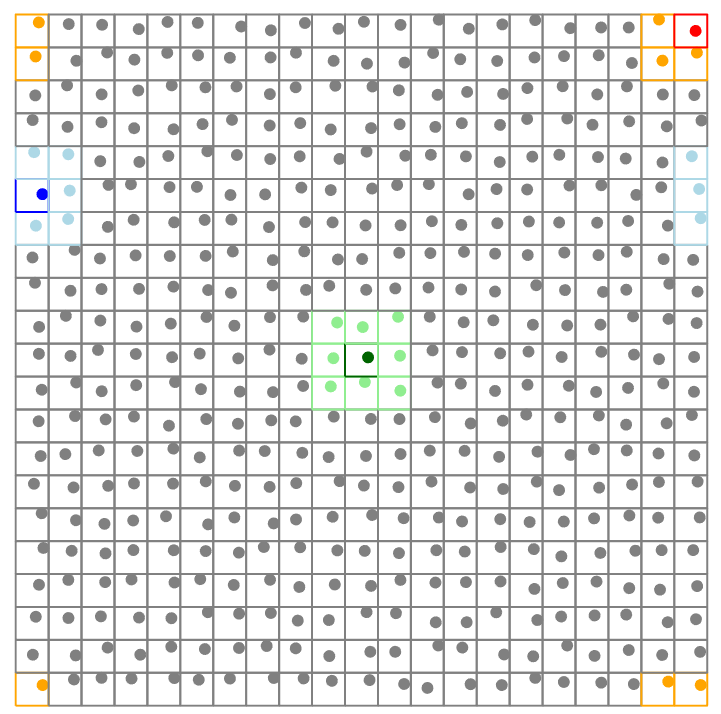

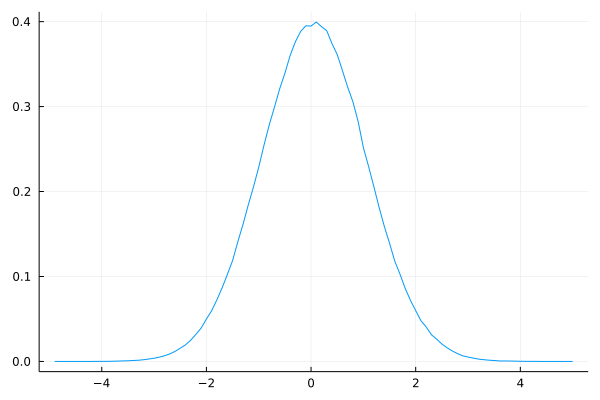

In [1]:
using StatsBase, Plots, LinearAlgebra
X = randn(1_000_000)
h = StatsBase.fit(Histogram, X,-5:0.1:5,closed=:right)
plot(h.edges[1][2:end], h.weights./norm(h), key = false)

In [2]:
using StatsBase, Plots, LinearAlgebra

In [3]:
include("algebraic_solvers_PaulinaRaquelMartínCornejo-TeodoraIreneOrtizCruz-JesúsAlbertoTeresaVargas-OrlandoSánchezPatiño.jl")

solucionador_biseección_con_adivinanza (generic function with 2 methods)

In [22]:
mutable struct hard_disk
    mass::Float
    position::Vector{Float}
    velocity::Vector{Float}
    angular_velocity::Vector{Float}
    radius::Real
    cell::Int
end

In [ ]:
mutable struct particle
    mass::Float
    position::Vector{Float}
    velocity::Vector{Float}
    n_cell::Int
end

Adaptando la funcion presentada en clases por el profesor Atahualpa, definimos la funcion `Disco_Duro` para una caja cuadrada.

In [23]:
function Hard_Disk(mass::Float, position::Vector{Float}, velocity::Vector{Float}, angular_velocity::Vector{Float}, radius::Float, L::Float = 1)
    n = floor(L /(3 * radio))
    l = L / n
    n_x, n_y = ceil(position[1] / l), ceil(position[2] / l)
    
    if n_y == 0
        n_y = 1
    end
    
    if n_x == 0
        n_x = 1
    end
    
    n_cell = Int(n_x + (n_y - 1) * n)
    disco_duro(mass, position, velocity, angular_velocity, radius, n_cell)
end

Disco_Duro (generic function with 2 methods)

In [24]:
r = [1,2]

2-element Vector{Int64}:
 1
 2

In [25]:
function Disco_Duro(masa, posicion, velocidad, velocidad_angular, radio, Lx, Ly = 1)
    length(radio) == 1 ? r = radio : r = min(r)[1]
    nx = floor(Lx / (3 * r))
    ny = floor(Ly /(3 * r))
    lx = Lx / nx
    ly = Ly / ny

    n_x, n_y = ceil(posicion[1] / lx), ceil(posicion[2] / ly)
    
    if n_y == 0
        n_y = 1
    end
    
    if n_x == 0
        n_x = 1
    end
    
    n_celda = Int(n_x + (n_y - 1) * n) # falta terminar de adaptar este paso
    disco_duro(masa, posicion, velocidad, velocidad_angular, radio, n_celda)
end

Disco_Duro (generic function with 3 methods)

In [26]:
import Base.zero

In [27]:
function zero(d::disco_duro)
    x = d.masa
    y = d.posicion
    Disco_Duro(zeros(x), zero(y), zero(y), zeros(x), 1)
end

zero (generic function with 45 methods)

1. Considera una partícula puntual con posición $\vec{x}$ y velocidad dada $\vec{v}$ y un disco duro fijo con un radio $2r$ y posición $\vec{c}$ dados. Haz una función que con esa información te arroje true o false si colisiona la partícula con el disco o no y si colisiona te arroja también el punto de colisión $vec{x}_f$ y el tiempo $t_c$ para que esto ocurra, si no te arroja [Inf, Inf] e Inf. Para resolver analíticamente este problema, te conviene escribir la ecuación de la trayectoria de la partícula paramétricamente (en términos del tiempo), de las dos soluciones de la ecuación cuadrática que te saldrá (por la ecuación del círculo), la solución correcta en términos del parámetro es la positiva si la partícula está dentro del círculo y la más pequeña si está fuera del círculo. Si la solución fuera negativa, significa que no hay colisión y debe arrojarse [Inf, Inf] e Inf (pues se trataría de un tiempo negativo). Sólo vamos a usar el caso donde la partícula está fuera del disco, así que puedes sólo quedarte con el parámetro más pequeño. Para hacer un mejor código de esto, conviene que antes de hacer el cálculo, revises si puede haber colisión, es decir, si la proyección de la velocidad de la partícula puntual sobre el vector que une al centro del disco con la partícula es positivo o negativo. Si es positivo entonces no puede haber colisión y puedes arrojar directamente [Inf, Inf] e Inf sin resolver la cuadrática (esto es equivalente a notar que si hubiera colisión, esta sería en un tiempo negativo). Es importante esto último para evitar que una partícula $i$ que acaba de colisionar con otra $j$, en el siguiente paso diga que $i$ y $j$ colisionan en un tiempo $\approx 0$. 

Como no hay fuierzas externas, la particula puntual llevara a cabo un movimiento rectilineo uniforme. Este problema puede resolverse de dos maneras disitntas. La primera es sustituir las ecuaciones de movimento de la partícula en la ecuación de la circunferencia y encontrar las soluciones correspondientes con la fórmula general para encontrar raíces de un polinomio cuadrático. Este primer método permite encontrar soluciones analíticamente. La segunda manera consiste en igualar, entrada a a entrada, las ecuaciones de movimiento de la partícula con las ecuaciones paramétricas de la circunferencia. Una posible desventaja de este enfoque es que la busqueda de la solución no es analítica y debe encontrarse con algún método numérico como el método de Newton.

A continuación se implementarán ambas ideas:

Dada la ecuaci[

In [4]:
# Ecuación paramétrica de la circunferencia
x_c(t) = c[1] + 2*r*cos(t)
y_c(t) = c[2] + 2*r*sin(t)

# Ecuaciones de movimeinto de la partícula (MRU)
x_p(t) = v[1]*t + x[1]
y_p(t) = v[2]*t + x[2]

y_p (generic function with 1 method)

### (i) Método I

La ecuación de la circunferencia con centro $\vec c = (c_x, c_y)$ es 

$$ (x - c_x)^2 + (y - c_y)^2 = r^2. $$

Sustituyendo las ecuaciones de movimiento de la partícula en la ecuación de la circunferencia llegamos a que

$$ (v_x t + x_0 - c_x)^2 + (v_y t + y_0 - c_y)^2 = r^2) $$

$$ \Rightarrow (v_x t + x_0)^2 - 2(v_x t + x_0)c_x + c_x^2 + (v_y t + y_0)^2 - 2(v_y t + y_0)c_y + c_y^2 = r^2 $$

$$ \Rightarrow v^2_x t^2 + 2 v_x x_0 t + x^2_0 - 2v_x c_x t - 2x_0 c_x + c_x ^2 + v^2_y t^2 + 2 v_y y_0 t + y^2_0 - 2v_y c_y t- 2y_0 c_y + c_y^2= r^2$$

Agrupando términos llegamos a que

$$ (v^2_x + v^2_y) t^2 + (2 v_x x_0 - 2 v_x c_x + 2 v_y y_0 - 2v_y c_y) t + (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2) = 0 $$

donde $a = v^2_x + v^2_y$, $b = 2 v_x x_0 - 2 v_x c_x + 2 v_y y_0 - 2v_y c_y $  y  $c = x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2$.

Por lo que las soluciones dadas por la fórmula general son

$$ t = \dfrac{- 2(v_x x_0 - v_x c_x + v_y y_0 - v_y c_y) \pm \sqrt{4( v_x x_0 - v_x c_x + v_y y_0 - v_y c_y)^2 - 4 (v^2_x + v^2_y) (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2)}}{2 (v^2_x + v^2_y)}  $$

$$ \Rightarrow t = \dfrac{- 2(v_x x_0 - v_x c_x + v_y y_0 - v_y c_y) \pm 2\sqrt{( v_x x_0 - v_x c_x + v_y y_0 - v_y c_y)^2 -  (v^2_x + v^2_y) (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2)}}{2 (v^2_x + v^2_y)}  $$

$$ \Rightarrow t = \dfrac{- (v_x x_0 - v_x c_x + v_y y_0 - v_y c_y) \pm \sqrt{( v_x x_0 - v_x c_x + v_y y_0 - v_y c_y)^2 -  (v^2_x + v^2_y) (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2)}}{ (v^2_x + v^2_y)}  $$


In [5]:
function selecciona_tiempo(t)
    if t[1] < 0 && t[2] < 0
        return error("El sistema no tiene solución física para la colisión, ya que ambas solcuiones representan tiempos negativos. ")
        
    elseif t[1] < 0 || t[2] < 0 # Para hacer este caso mas especifico podria agregarse una condicion adicional: & !(t[1] < 0 && t[2] < 0)
        t_c = findfirst(x -> x>0, t)
        return t_c
    
    elseif t[1] > 0 && t[2] > 0
        t_c = findmin(t)[1]
        return t_c
   
    elseif t[1] == 0 || t[2] == 0
        return error("Los discos ya colisionaron en el tiempo inicial")
    
    else
        error("Esta funcion solo recibe un vector en dos dimensiones.")
    end
end

selecciona_tiempo (generic function with 1 method)

$$ (v^2_x + v^2_y) t^2 + (2 v_x x_0 - 2 v_x c_x + 2 v_y y_0 - 2v_y c_y) t + (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- 4 r^2) = 0 $$

donde $a = v^2_x + v^2_y$, $b = 2 v_x x_0 - 2 v_x c_x + 2 v_y y_0 - 2v_y c_y $  y  $c = x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2$.

In [6]:
function particle_disc_collision(x, v, r, c, m::Val{:method1})
    r_dp = x - c # vector que une al centro del disco con la particula
    proy = dot(v, r_dp)/norm(r_dp) #proyeccion de la velocidad sobre el vector previamente definido
    
    if proy < 0 # Hay colision y no se empalman
        # Ecuacion general
        a = v[1]^2 + v[2]^2
        b = 2 * (v[1] * x[1] - v[1] * c[1] + v[2] * x[2] - v[2] * c[2])
        c = x[1]^2 + x[2]^2 + c[1]^2 + c[2]^2 - 2 * x[1] * c[1] - 2 * x[2] * c[2] - r^2
        t1_sol = (-b + sqrt(b^2 - 4 * a * c)) / (2 * a)
        t2_sol = (-b - sqrt(b^2 - 4 * a * c)) / (2 * a)
        t_sol = [t1_sol, t2_sol]
        t_c = selecciona_tiempo(t_sol)
        𝑣𝑒𝑐𝑥𝑓 =  [x_p(t_c), y_p(t_c)]
        #𝑣𝑒𝑐𝑥𝑓2 =  [x_p(t2_sol), y_p(t2_sol)]
        return true, 𝑣𝑒𝑐𝑥𝑓, t_c
    
    elseif proy > 0 # No hay colision y no se empalman
        return false, [Inf, Inf], Inf
        
    else
        return "La proyeccion es cero"
    end
    
end

colision_disco_particula (generic function with 1 method)

In [7]:
colision_disco_particula(x, v, r, c, s::Symbol) = colision_disco_particula(x, v, r, c, Val(s))

colision_disco_particula (generic function with 2 methods)

### (ii) Método II

Dados los vectores $\vec{x} = (x, y)$, $\vec{c} = (c_x, c_y)$, $\vec{v} = (v_x, v_y)$ y la transformación de coordenadas de cartesianas a polares $(x, y) \rightarrow (r cos \theta, r sen \theta)$, obtenemos que 

$$ x_{\text{colision}}(t) = c_x + 2r cos(t) - v_x t - x_0$$ y 
$$ y_{\text{colision}}(t) = c_y + 2r sen(t) - v_y t - y_0$$

In [8]:
# Ecuaciones 
x_colision(t) = c[1] + 2*r*cos(t) - v[1]*t - x[1] # x denota el vector de posiciones iniciales
y_colision(t) = c[2] + 2*r*sin(t) - v[2]*t - x[2]

y_colision (generic function with 1 method)

In [9]:
function colision_disco_particula(x, v, r, c, m::Val{:metodo2}; ϵ = 1e-10, x0 = 1., kwargs...)
    r_dp = x - c # vector que une al centro del disco con la particula
    proy = dot(v, r_dp)/norm(r_dp) #proyeccion de la velocidad sobre el vector previamente definido
    
    if proy < 0 # Hay colision
        # Ecuaciones de movimiento
        x_p(t) = v[1] * t + x[1]
        y_p(t) = v[2] * t + x[2]
        # Ecuaciones del MRU para x,y igualados respectivamente a las ecuaciones parametricas de la circunferencia.
        # Nota. Esto se puede plantear en terminos vectoriales
        x_colision(t) = c[1] + r * cos(t) - v[1] * t - x[1] 
        y_colision(t) = c[2] + r * sin(t) - v[2] * t - x[2]
        t_sol = [solucionador_Newton_Raphson(x_colision, x0, ϵ), solucionador_Newton_Raphson(y_colision, 1., ϵ)]
        t_c = selecciona_tiempo(t_sol)
        𝑣𝑒𝑐𝑥𝑓 =  [x_p(t_c), y_p(t_c)]
        return true, 𝑣𝑒𝑐𝑥𝑓, t_c
    
    elseif proy > 0 # No hay colision
        return false, [Inf, Inf], Inf
        
    else
        return "La proyeccion es cero"
    end
    
end

colision_disco_particula (generic function with 3 methods)

Ahora probamos ambas funciones

In [10]:
x = [2,0]
v = [-1, 0]
r = 1
c = [0.,0.]

2-element Vector{Float64}:
 0.0
 0.0

In [11]:
a = colision_disco_particula(x, v, r, c, :metodo1)

(true, [1.0, 0.0], 1.0)

In [12]:
colision_disco_particula(x, v, r, c, :metodo2)

(true, [1.9999999999997076, 0.0], 2.923566201412306e-13)

2. Entre 2 discos duros con radios $r_1$ y $r_2$, posiciones dadas $\vec{x}_1$ y $\vec{x}_2$ y velocidades dadas $\vec{v}_1$ y $\vec{v}_2$, puedes calcular el punto de colisión poniendote en el sistema de referencia de uno de los discos duros, de forma que está fijo, luego crecer el radio del disco que está fijo a $R = r_1+r_2$ y decrecer el radio del que se mueve hasta ser un punto. En ese sistema de referencia, la colisión se dará sólo si la partícula puntual colisiona con el disco fijo y si lo hace, esta sucederá cuando el centro del disco movil esté en la posición donde la partícula colisiona. De esta forma, puedes usar la función anterior para obtener la el punto de colisión (es decir, las posiciones de los centros de ambos discos) simplemente cambiando de sistema de coordenadas y luego regresando al sistema original después de la colisión. Haz una función que haga eso, es decir, que dadas los radios, posiciones y velocidades de 2 discos arroje true, las posiciones en el punto de colisión de ambos discos y el tiempo de colisión $t_c$, y false, [Inf,Inf], [Inf,Inf] e Inf si no colisionan. 

Sin perder generalidad, plantearemos el problema de modo que el disco 1 es el que se queda fijo 

In [13]:
MRU(t, v, x0, dim::Val{:x}) = v[1]*t + x0[1]
MRU(t, v, x0, dim::Val{:y}) = v[2]*t + x0[2]
MRU(t, v, x0, s::Symbol) = MRU(t, v, x0, Val(s))

MRU (generic function with 3 methods)

In [14]:
function colision_disco_disco(r1, r2, x1, x2, v1, v2, ω1, ω2; metodo = :metodo1)
    # Disco 1 = disco fijo, Disco 2 = disco movil = particula
    X = x2 - x1
    V = v2 - v1
    R = r1 + r2
    C = [0., 0.] # El disco que tomamos como fijo es el 1 y en su propio SRI se encuentra en el origen
    sol_discofijo_particula = colision_disco_particula(X, V, R, C, metodo)
    
    if (norm(X) > R) && sol_discofijo_particula[1]
        t_c = sol_discofijo_particula[3]
        pos_disco_movil = [MRU(t_c, v2, x2, :x), MRU(t_c, v2, x2, :y)] # el centro del disco movil esté en la posición donde la partícula colisiona
        pos_disco_fijo = [MRU(t_c, v1, x1, :x), MRU(t_c, v1, x1, :y)]
        return true, pos_disco_movil, pos_disco_fijo, t_c
    
    elseif norm(X) < R # se empalman
        return error("Los dos discos se empalman.")
    
    else
        return false, [Inf, Inf], [Inf, Inf], Inf
    end
end

colision_disco_disco (generic function with 1 method)

In [ ]:
η(Θ, m, R) = Θ / (m * R^2)

In [15]:
#En esete caso, los discos ya estaban tocandose desde el tiempo inicial
x1 = [1,0]
v1 = [-1,0]
x2 = [-1, 0.]
v2 = [1, 0]
r1 = r2 = 1

colision_disco_disco(r1, r2, x1, x2, v1, v2; metodo = :metodo1)

LoadError: Los discos ya colisionaron en el tiempo inicial

In [16]:
#En este caso esperamos que los discos colisionen en el origen al tiempo t = 1
x1 = [2,0]
v1 = [-1,0]
x2 = [-2, 0.]
v2 = [1, 0]
r1 = r2 = 1

colision_disco_disco(r1, r2, x1, x2, v1, v2; metodo = :metodo1)

(true, [-1.0, 0.0], [1.0, 0.0], 1.0)

3. Escribe las ecuaciones de conservación de energía y momento de los dos discos y con ello calcula las velocidades después de la colisión entre las partículas dadas las posiciones de los centros de las partículas en el punto de colisión, los radios y las velocidades iniciales. Con esto haz una función que dados los radios, posiciones y velocidades de 2 discos, arroje true y las posiciones y velocidades de las partículas justo después de la colisión si estas colisionan y false e [Inf, Inf] y [Inf, Inf] si no colisionan.  

Suponemos que las colisiones entre los discos son de tipo elástico, y partiendo de la conservacion del momento total y la   
$$m_{1} \mathbf{v}_{\mathbf{1}}^{\prime}+m_{2} \mathbf{v}_{\mathbf{2}}^{\prime}=m_{1} \mathbf{v}_{\mathbf{1}}+m_{2} \mathbf{v}_{\mathbf{2}}$$
La conservación de la energía cinética:    
$$\frac{m_{1} v_{1}^{\prime 2}}{2}+\frac{m_{2} v_{2}^{\prime 2}}{2}=\frac{m_{1} v_{1}^{2}}{2}+\frac{m_{2} v_{2}^{2}}{2}$$ 

Ahora pensando que el vector unitario n es normal a las superficies de las bolas en el punto de contacto:  
$$\mathrm{n}=\frac{\mathrm{x}_{2}-\mathrm{x}_{1}}{\left\|\mathrm{x}_{2}-\mathrm{x}_{1}\right\|}$$
ademas consideramos que un vector unitario t es tangente a las superficies de las bolas en el punto de contacto y perpendicular a el vector unitario n, tieniendo que:  
$$
\left\{\begin{array}{l}
\left\langle\mathbf{v}_{1}^{\prime} \mid \mathbf{t}\right\rangle=\left\langle\mathbf{v}_{1} \mid \mathbf{t}\right\rangle \\
\left\langle\mathbf{v}_{2}^{\prime} \mid \mathbf{t}\right\rangle=\left\langle\mathbf{v}_{\mathbf{2}} \mid \mathbf{t}\right\rangle
\end{array}\right.
$$
Ahora tomemos los componentes tangenciales de las velocidades, que  no han cambiado. ahora  podemos reescribir las leyes de conservación con componentes normales y ahora tenemos un problema 1D obtiendo que:  
$$
\begin{aligned}
m_{1}\left\langle\mathbf{v}_{\mathbf{1}}^{\prime} \mid \mathbf{n}\right\rangle+m_{2}\left\langle\mathbf{v}_{\mathbf{2}}^{\prime} \mid \mathbf{n}\right\rangle &=m_{1}\left\langle\mathbf{v}_{\mathbf{1}} \mid \mathbf{n}\right\rangle+m_{2}\left\langle\mathbf{v}_{\mathbf{2}} \mid \mathbf{n}\right\rangle \\
m_{1}\left\langle\mathbf{v}_{\mathbf{1}}^{\prime} \mid \mathbf{n}\right\rangle^{2}+m_{2}\left\langle\mathbf{v}_{\mathbf{2}}^{\prime} \mid \mathbf{n}\right\rangle^{2} &=m_{1}\left\langle\mathbf{v}_{\mathbf{1}} \mid \mathbf{n}\right\rangle^{2}+m_{2}\left\langle\mathbf{v}_{\mathbf{2}} \mid \mathbf{n}\right\rangle^{2}
\end{aligned}
$$

ahora factorizando la conservación de la energía cinética  y luego simplificando con la conservación del momento se obtiene que:  
$$
\begin{aligned}
&m_{1}\left\langle\mathbf{v}_{\mathbf{1}}^{\prime} \mid \mathbf{n}\right\rangle^{2}-m_{1}\left\langle\mathbf{v}_{\mathbf{1}} \mid \mathbf{n}\right\rangle^{2}=m_{2}\left\langle\mathbf{v}_{\mathbf{2}} \mid \mathbf{n}\right\rangle^{2}-m_{2}\left\langle\mathbf{v}_{\mathbf{2}}^{\prime} \mid \mathbf{n}\right\rangle^{2} \\
&\Rightarrow\left\langle\mathbf{v}_{\mathbf{1}}^{\prime} \mid \mathbf{n}\right\rangle+\left\langle\mathbf{v}_{\mathbf{1}} \mid \mathbf{n}\right\rangle=\left\langle\mathbf{v}_{\mathbf{2}} \mid \mathbf{n}\right\rangle+\left\langle\mathbf{v}_{\mathbf{2}}^{\prime} \mid \mathbf{n}\right\rangle
\end{aligned}
$$
ahora si combinamos esta última expresión con la conservación del momento y obtenemos la componente normal de v'1:
$$
\left\langle\mathbf{v}_{\mathbf{1}}^{\prime} \mid \mathbf{n}\right\rangle=\frac{\left(m_{1}-m_{2}\right)\left\langle\mathbf{v}_{\mathbf{1}} \mid \mathbf{n}\right\rangle+2 m_{2}\left\langle\mathbf{v}_{\mathbf{2}} \mid \mathbf{n}\right\rangle}{m_{1}+m_{2}}=\left\langle\mathbf{v}_{\mathbf{1}} \mid \mathbf{n}\right\rangle-\frac{2 m_{2}\left\langle\mathbf{v}_{\mathbf{1}}-\mathbf{v}_{\mathbf{2}} \mid \mathbf{n}\right\rangle}{m_{1}+m_{2}}
$$
finalmente expresando el vector unitario en terminos del vector de posicion $
\mathbf{x}_{\mathbf{i}}$
$$
\mathbf{v}_{\mathbf{1}}^{\prime}=\left\langle\mathbf{v}_{\mathbf{1}}^{\prime} \mid \mathbf{n}\right\rangle \mathbf{n}+\left\langle\mathbf{v}_{\mathbf{1}}^{\prime} \mid \mathbf{t}\right\rangle \mathbf{t}=\mathbf{v}_{\mathbf{1}}-\frac{2 m_{2}}{m_{1}+m_{2}} \frac{\left\langle\mathbf{v}_{\mathbf{1}}-\mathbf{v}_{\mathbf{2}} \mid \mathbf{x}_{\mathbf{1}}-\mathbf{x}_{\mathbf{2}}\right\rangle}{\left\|\mathbf{x}_{\mathbf{1}}-\mathbf{x}_{\mathbf{2}}\right\|^{2}}\left(\mathbf{x}_{\mathbf{1}}-\mathbf{x}_{\mathbf{2}}\right)
$$
analogamente para  $\mathbf{v}_{2}$  
$$
\mathbf{v}_{2}^{\prime}=\mathbf{v}_{2}-\frac{2 m_{1}}{m_{1}+m_{2}} \frac{\left\langle\mathbf{v}_{2}-\mathbf{v}_{1}, \mathbf{x}_{2}-\mathbf{x}_{1}\right\rangle}{\left\|\mathbf{x}_{2}-\mathbf{x}_{1}\right\|^{2}}\left(\mathbf{x}_{2}-\mathbf{x}_{1}\right)
$$




Por tanto, las velocidades finales de las particulas serán

$$
\begin{aligned}
\mathbf{v}_{1}^{\prime} &=\mathbf{v}_{1}-\frac{2 m_{2}}{m_{1}+m_{2}} \frac{\left\langle\mathbf{v}_{1}-\mathbf{v}_{2}, \mathbf{x}_{1}-\mathbf{x}_{2}\right\rangle}{\left\|\mathbf{x}_{1}-\mathbf{x}_{2}\right\|^{2}}\left(\mathbf{x}_{1}-\mathbf{x}_{2}\right) \\
\mathbf{v}_{2}^{\prime} &=\mathbf{v}_{2}-\frac{2 m_{1}}{m_{1}+m_{2}} \frac{\left\langle\mathbf{v}_{2}-\mathbf{v}_{1}, \mathbf{x}_{2}-\mathbf{x}_{1}\right\rangle}{\left\|\mathbf{x}_{2}-\mathbf{x}_{1}\right\|^{2}}\left(\mathbf{x}_{2}-\mathbf{x}_{1}\right)
\end{aligned}
$$

donde $u_i$ es la velocidad antes de la colisión de la partícula i, y $v_i$ es la velocidad despues de la colisión de la particula i.

In [17]:
function dinamica_colision_disco_disco(r1, r2, x1, x2, v1, v2; m1 = 1, m2 = 1, metodo = :metodo1)
    colision = colision_disco_disco(r1, r2, x1, x2, v1, v2; metodo = metodo)[1:3]
    if colision[1]
        a = 1 / (norm(x1 - x2)^2)
        b1 = (2 * m2)/(m1 + m2)
        b2 = (2 * m1)/(m1 + m2)
        v1_f = v1 - (b1 * dot(v1 - v2, x1 - x2) * a * (x1 - x2))
        v2_f = v2 - (b2 * dot(v2 - v1, x2 - x1) * a * (x2 - x1))
        return colision[1], colision[2], colision[3], v1_f, v2_f
    else
        return colision
    end
end

dinamica_colision_disco_disco (generic function with 1 method)

In [ ]:
function particle_disc_collision_dynamics(r1, x1, x2, v1, v2; m1 = 1, m2 = 1, metodo = :metodo1)
    collision = colision_disco_disco(r1, r2, x1, x2, v1, v2; metodo = metodo)[1:3]
    if colision[1]
        a = 1 / (norm(x1 - x2)^2)
        b1 = (2 * m2)/(m1 + m2)
        b2 = (2 * m1)/(m1 + m2)
        v1_f = v1 - (b1 * dot(v1 - v2, x1 - x2) * a * (x1 - x2))
        v2_f = v2 - (b2 * dot(v2 - v1, x2 - x1) * a * (x2 - x1))
        return colision[1], colision[2], colision[3], v1_f, v2_f
    else
        return colision
    end
end

In [18]:
x1 = [2,0]
v1 = [-1,0]
x2 = [-2, 0.]
v2 = [1, 0]
r1 = r2 = 1
dinamica_colision_disco_disco(r1, r2, x1, x2, v1, v2)

(true, [-1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [-1.0, 0.0])

In [19]:
x1 = [1,1]
v1 = [-1,0]
x2 = [-1, -1]
v2 = [1, 0]
r1 = r2 = 1
dinamica_colision_disco_disco(r1, r2, x1, x2, v1, v2)

(true, [0.0, -1.0], [0.0, 1.0], [-2.220446049250313e-16, 0.9999999999999998], [2.220446049250313e-16, -0.9999999999999998])

In [20]:
x1 = [1,0]
v1 = [-1,0]
x2 = [-1, 0.]
v2 = [1, 0]
r1 = r2 = 1
dinamica_colision_disco_disco(r1, r2, x1, x2, v1, v2)

LoadError: Los discos ya colisionaron en el tiempo inicial

In [21]:
x1 = [0.,0]
v1 = [-1,0]
x2 = [-1, 0.]
v2 = [1, 0]
r1 = r2 = 1
dinamica_colision_disco_disco(r1, r2, x1, x2, v1, v2)

LoadError: Los dos discos se empalman.

4. Ya puedes simular 2 partículas en el plano, ahora vamos a simular muchas partículas en el plano. Para esto usa el método de celdas, para lo que te conviene hacer tu objeto disco_duro, que incluya entre sus propiedades la masa, velocidad, radio, posición y celda en la que se encuentra. El tamaño de la celda en este caso conviene que sea un poco mayor que un diámetro del disco (van a ser todos iguales, pero si quisieras poner tamaños diferentes, tendría que ser un poco mayor que el disco de mayor tamaño). Para esto requieres definir también una caja donde las partículas estarán, que la puedes definir con la longitud de un cuadrado $L$ o de un rectángulo $L_x$ y $L_y$. Yo re recomiendo que tu caja sea siempre de lado $L = 1$ o en el caso rectangular (que puede ser a veces útil), igual uno de los lados igual a $1$. En ese caso, los radios de las partículas tendrán que ser chiquititos en general. Para hacer las celdas puedes buscar dividir $L$ de tal forma que tengas celdas de lado $l \approx 3r$, donde $l$ es el lado de la celda. Haz una función que dada una $L$, $r$, $m$, un arreglo de posiciones y un arreglo de velocidades, produzca los correspondientes objetos disco_duro, incluyendo sus respectivas celdas.

In [28]:
function Discos_Duros(masa::Vector, posicion::Vector{Vector}, velocidad::Vector{Vector}, radio::Vector, L = 1)
    Discos = []
    for i in 1:length(posicion)
        disco = Disco_Duro(masa[i], posicion[i], velocidad[i], radio[i])
        push!(Discos, disco)
    end
    return Discos
end

Discos_Duros (generic function with 2 methods)

In [29]:
Discos_Duros(m::Real, posicion::Vector{Vector}, velocidad::Vector{Vector}, radio::Real, L = 1) = Discos_Duros(repeat([m], length(posicion)), posicion, velocidad, repeat([r], length(posicion)), L) 

Discos_Duros (generic function with 4 methods)

5. Ahora necesitamos poder cambiar de celda las partículas al evolucionar el sistema. Haz una función que dadas las posiciones y velocidades de las partículas, encuentre qué partícula sale primero de su respectiva celda y que arroje el índice de la partícula, el tiempo que tarda en salir y la celda a la que entra.  

Este inciso puede implementarse de varias maneras. Una de ellas es encontrando la intersección de una circunferencia (disco) con un cuadrado. Para ello primero encontraremos la intersección de una circunferenca con un segmento, y luego de una circunferencia con un conjunto de segmentos. Esta interseccion puede calcularse de forma analitica o de forma numerica. Por el tiempo que nos queda lo haremos de manera numerica, aunque para nuestro caso es la opcion menos recomendable pues este paso es fundamental en la simulacion y debe minimizarse el error que pueda generarse por cualqueir medio.

In [30]:
# Ecuacion parametrica 
x_c(t) = c[1] + 2*r*cos(t)
y_c(t) = c[2] + 2*r*sin(t)

# Ecuacion parametrica de segmento
x_s(t) = pos_s[1] + dir_s[1]*t
y_s(t) = pos_s[2] + dir_s[2]*t

y_s (generic function with 1 method)

In [31]:
function interseccion_circunferencia_segmento(pos_c, radio, pos_s, dir_s, I; ϵ = 0.001)
    # Ecuación paramétrica de la circunferencia
    x(t) = pos_c[1] + radio*cos(t) - pos_s[1] - dir_s[1]*t
    y(t) = pos_c[2] + radio*sin(t) - pos_s[2] - dir_s[2]*t
    sol_x = solucionador_Newton_Raphson(x, 0.1, ϵ)
    sol_y = solucionador_Newton_Raphson(y, 0.1, ϵ)
    sol_x, sol_y
end

interseccion_circunferencia_segmento (generic function with 1 method)

In [32]:
interseccion_circunferencia_segmento([0,0], 1, [0.5, -1], [0,1], [-1, 1], ϵ = 1e-9)

(5.235987755938162, 1.9345632107698245)

In [33]:
function cambio_de_celda(vec_pos, vec_vel;)
    

LoadError: syntax: unexpected ")"

6. Ahora necesitamos agregar las condiciones a la frontera. Para esto necesitas reconocer qué celdas corresponden a la frontera del sistema. Dado un $L$, haz una función que obtenga las celdas que corresponden a la frontera, además que obtenga si estas celdas son de la frontera inferior, superior, izquera o derecha. Tu función puede por ejemplo regresar una matriz donde los elementos son una tupla de dos números, el primero corresponde a la frontera abajo-arriba y es -1,0 o 1 dependiendo de si la celda en cuestión es una celda de abajo, no es celda ni de arriba ni de abajo, o si es celda de arriba. Similar para el segundo número que sería una celda de frontera izquierda-derecha. Esto lo necesitarás para el siguiente paso. 

In [34]:
function celdas_en_frontera(L, r)
    l_celdas = Int64(floor(L /(3 * r))) #se tienen
    N_celdas = l_celdas^2
    M = fill((0.,0.), N_celdas) # Vector de tuplas
    
    for k in 1:N_celdas
        i = ceil(k/l_celdas) # fila que corresponde al numero de celda k
        j = k - (i - 1) * l_celdas # columna que corresponde al numero de celda k
        
        if i == 1 # arriba
            m = 1
        elseif i == l_celdas # abajo
            m = -1
        else 
            m = 0
        end
        
        if j == 1 # izquierdo
            n = -1
        elseif j == l_celdas # derecho
            n = 1
        else 
            n = 0
        end
        
        M[k] = (m, n)
    end
    return permutedims(reshape(M, (l_celdas, l_celdas))) # Hacemos un reshape y una trasnposicion para que quede en forma de amtriz
    #return reshape(reverse(M), (l_celdas, l_celdas))
    
end

celdas_en_frontera (generic function with 1 method)

In [35]:
celdas_en_frontera(1, 0.01)

33×33 Matrix{Tuple{Float64, Float64}}:
 (1.0, -1.0)   (1.0, 0.0)   (1.0, 0.0)   …  (1.0, 0.0)   (1.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)   …  (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)   …  (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 ⋮                                       ⋱               
 (0.0, -1.0)   (0.0

Hacemos una funcion auxiliar y reescribimos la funcion anterior

In [36]:
function encuentra_fila_columna(L, r, k) 
    l_celdas = Int64(floor(L /(3 * r))) #se tienen
    N_celdas = l_celdas^2
    i = ceil(k/l_celdas) # fila que corresponde al numero de celda k
    j = k - (i - 1) * l_celdas # columna que corresponde al numero de celda k
    return Int64(i), Int64(j)
end

encuentra_fila_columna (generic function with 1 method)

In [37]:
function celdas_en_frontera(L, r)
    l_celdas = Int64(floor(L /(3 * r))) #se tienen
    N_celdas = l_celdas^2
    M = fill((0.,0.), N_celdas) # Vector de tuplas
    
    for k in 1:N_celdas
        i, j = encuentra_fila_columna(L, r, k)
        
        if i == 1 # arriba
            m = 1
        elseif i == l_celdas # abajo
            m = -1
        else 
            m = 0
        end
        
        if j == 1 # izquierdo
            n = -1
        elseif j == l_celdas # derecho
            n = 1
        else 
            n = 0
        end
        
        M[k] = (m, n)
    end
    return permutedims(reshape(M, (l_celdas, l_celdas))) # Hacemos un reshape y una trasnposicion para que quede en forma de amtriz
    #return reshape(reverse(M), (l_celdas, l_celdas))
    
end

celdas_en_frontera (generic function with 1 method)

In [38]:
M = celdas_en_frontera(1, 0.01)

33×33 Matrix{Tuple{Float64, Float64}}:
 (1.0, -1.0)   (1.0, 0.0)   (1.0, 0.0)   …  (1.0, 0.0)   (1.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)   …  (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)   …  (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 (0.0, -1.0)   (0.0, 0.0)   (0.0, 0.0)      (0.0, 0.0)   (0.0, 1.0)
 ⋮                                       ⋱               
 (0.0, -1.0)   (0.0

Observamos que obtenemos la misma matriz.

7. El siguiente paso es encontrar qué colisión ocurre primero. Para esto usarás el método de celdas. Sobre cada partícula revisarás el tiempo de colisión entre esta y todas las partículas que están en su celda y las 8 celdas de alrededor. Si la celda en la que se encuentra la partícula es una celda de frontera, entonces las celdas con las que revisa deben incluir las de la frontera opuesta, es decir, si es por ejemplo una celda de "arriba", debe incluir 3 celdas de "abajo" (como se muestra en la figura). La función debe arrojar el mínimo tiempo de colisión entre todas las partículas dado el arreglo de discos duros.

Primero tomamos la función vista en clase para encontrar los vecinos de cada celda.

In [39]:
function jj(i,n,m)
    mod(floor(Int,(i-1)/n), m)
end

# Esta retícula tiene condiciones periódicas a la frontera que se ven en las funciones mod1 y mod. 
function vecinos(n,m)  
    [[mod1(i-1, n)+jj(i,n,m)*n, mod1(i+1, n) + jj(i,n,m)*n, mod1(i-1, n) + mod((jj(i,n,m)-1), m)*n,
    mod1(i+1, n) + mod((jj(i,n,m)-1), m)*n, mod1(i-1, n) + mod((jj(1,n,m)+1),m)*n, mod1(i+1, n) + mod((jj(i,n,m)+1),m)*n,   
    mod1(i, n)+mod((jj(i,n,m)-1),m)*n, mod1(i, n)+mod((jj(i,n,m)+1),m)*n] for i in 1:n*m]
end  

vecinos(n) = vecinos(n, n)

vecinos (generic function with 2 methods)

In [40]:
vecinos(5)

25-element Vector{Vector{Int64}}:
 [5, 2, 25, 22, 10, 7, 21, 6]
 [1, 3, 21, 23, 6, 8, 22, 7]
 [2, 4, 22, 24, 7, 9, 23, 8]
 [3, 5, 23, 25, 8, 10, 24, 9]
 [4, 1, 24, 21, 9, 6, 25, 10]
 [10, 7, 5, 2, 10, 12, 1, 11]
 [6, 8, 1, 3, 6, 13, 2, 12]
 [7, 9, 2, 4, 7, 14, 3, 13]
 [8, 10, 3, 5, 8, 15, 4, 14]
 [9, 6, 4, 1, 9, 11, 5, 15]
 [15, 12, 10, 7, 10, 17, 6, 16]
 [11, 13, 6, 8, 6, 18, 7, 17]
 [12, 14, 7, 9, 7, 19, 8, 18]
 [13, 15, 8, 10, 8, 20, 9, 19]
 [14, 11, 9, 6, 9, 16, 10, 20]
 [20, 17, 15, 12, 10, 22, 11, 21]
 [16, 18, 11, 13, 6, 23, 12, 22]
 [17, 19, 12, 14, 7, 24, 13, 23]
 [18, 20, 13, 15, 8, 25, 14, 24]
 [19, 16, 14, 11, 9, 21, 15, 25]
 [25, 22, 20, 17, 10, 2, 16, 1]
 [21, 23, 16, 18, 6, 3, 17, 2]
 [22, 24, 17, 19, 7, 4, 18, 3]
 [23, 25, 18, 20, 8, 5, 19, 4]
 [24, 21, 19, 16, 9, 1, 20, 5]

Asimismo, tomamos la funcion vista en clase para inicializar las celdas

In [41]:
celdas(n) = [[] for i in 1:n_i^2]

celdas (generic function with 1 method)

Aunque la colisión simultanea de tres o más discos es posible, para este trabajo optaremos por simplificar la dinámica, por lo que para encontrar el tiempo de colisión supondremos que solamente pueden colisionar dos discos a la vez.

Primero hacemos una fucnión que dado un arreglo de discos, encuentre los discos que se encuentra en una determianda celda.

In [42]:
function encuentra_discos_en_celda(discos, celda_i)
    Discos = []
    for disco in discos
        if disco.celda == celda_i
            push!(disco, Discos)
        end
    end
    return Discos
end

encuentra_discos_en_celda (generic function with 1 method)

Ahora hagamos una funcion que encuentre las colisiones de la particula i con las particulas en su celda y en las celdas de alrededor. Como se requiere ecnontrar la colision entre dos objetos disco, hacemos la funcion correspondiente a partir de las funciones creadas en los incisos 1 y 2.

In [43]:
colision_disco_disco(a::disco_duro, b::disco_duro) = colision_disco_disco(a.radio, b.radio, a.posicion, b.posicion, c.velocidad, b.velocidad; metodo = :metodo1)

colision_disco_disco (generic function with 2 methods)

In [44]:
function encuentra_tiempo_colision_i(discos, i; L = 1, r = 0.01)
    n_celdas_lado = Int64(floor(L /(3 * r))) #se tienen
    vecinos = vecinos(n_celdas_lado)
    d_i = discos[i]
    celdas_a_revisar = vecinos[d_i.celda] ∪ [d_i.celda]
    T = [] # Vector de tiempos. Cada entrada sera un
    T_min = []
    
    for k in celdas_a_revisar
        i, j = encuentra_fila_columna(L, r, k)
        M = celdas_en_frontera(L, r)
        discos_alrededor = encuentra_discos_en_celda(discos, k)
        if discos_alrededor == [] # Si no hay ningun disco en la celda k, se debe revisar la siguiente celda porque no hay choques. Se supone que esta condicion no ocurre, pero por si a caso
            continue
        end
        
        if M[i, j] == (0.,0.) # Las celdas que no estan en la frontera
            for disco in discos_alrededor
                t_c = colision_disco_disco(d_i, disco)[4]
                push!(T, t_c)
            end
            t_min = minimum(T)
            push!(T_min, t_min)
        
        elseif  M[i,j][2] == 0 || M[i,j][1] == 0 # En fronteras, sin esquinas 
            #Frontera de arriba o abajo. (M[i, j] == (1.,0.)) || (M[i, j] == (-1., 0.)) es equivalente a M[i,j][2] == 0
            # Frontera de izquierda o derecha. (M[i, j] == (0.,1.)) || (M[i, j] == (0., -1.)) es equivalente a M[i,j][1] == 0
            for disco in discos_alrededor
                m, n = encuentra_fila_columna(L, r, disco.celda)
                if M[m, n] != M[i, j] # Identifica celdas en la frontera opuesta
                    disco_mod = deepcopy(disco)
                    M[i,j][2] == 0 ? a = M[m, n][1]*[0.,1.] : a = M[m, n][2]*[1.,0.] # Como la entrada 1 de M[m,n] indica si esta arriba o abajo, tambien indica que el desplazamiento ocurre en la direccion de y. Analogamente para la entrada 2
                    disco.posicion = disco_mod.posicion .+ a .* L # Desplazamos la posicion del disco para que todos los vecinos esten junto. El signo de la coordenada 1 de las tuplas indica si se desplaza hacia arriba  o hacia abajo
                end
                t_c = colision_disco_disco(d_i, disco)[4]
                push!(T, t_c)
            end
            t_min = minimum(T)
            push!(T_min, t_min)
                
        else # para las esquinas
            for disco in discos_alrededor
                m, n = encuentra_fila_columna(L, r, disco.celda)
                if M[m, n] != M[i, j] # Identifica celdas en la frontera opuesta
                    disco_mod = deepcopy(disco)
                    if M[i,j][2] == 0 
                        a = M[m, n][1] * [0.,1.] # para fronteras puestas de arriba y abajo
                    elseif M[i,j][1] == 0
                        a = M[m, n][2] * [1.,0.] # para fronteras puestas de izquierda y derecha
                    else
                        a = M[m, n][2] * [1.,1.] # para las esquinas de las esquinas
                    end
                    disco.posicion = disco_mod.posicion .+ a .* L # Desplazamos la posicion del disco para que todos los vecinos esten junto. El signo de la coordenada 1 de las tuplas indica si se desplaza hacia arriba  o hacia abajo
                end
                t_c = colision_disco_disco(d_i, disco)[4]
                push!(T, t_c)
            end
            t_min = minimum(T)
            push!(T_min, t_min)
             
        end
             
    end
    
    return minimum(T_min)
end
        


encuentra_tiempo_colision_i (generic function with 1 method)

Esta función podría simplificarse y podría partirse en varias funciones, pero por las prisas no nos dio tiempo de mejorar este código.

8. Ahora sí, a hacer la función para evolucionar el sistema. Tu función debe calcular primero el tiempo mínimo para cambiar de celda (función del paso 5), después calcular el tiempo mínimo para tener una colisión (paso 7) y de estos tiempos, obtener el mínimo de ellos. Si corresponde a un cambio de celda, simplmente modificar la posición de todas las partículas avanzándolas ese  tiempo mínimo de cambio de celda. Si corresponde a un tiempo de colisión, se avanza a todas las partículas y se modifica la velocidad de las partículas involucradas en la colisión. Haz una función evolucione el sistema un paso, arrojando las nuevas posiciones y velocidades y el tiempo que transcurrió. 

In [45]:
function evoluciona_un_paso(particulas, L)
    
end

evoluciona_un_paso (generic function with 1 method)

9. Usando la función anteriror haz otra que evolucione el sistema un tiempo $t$. Para esto, aplica la función anterior, cada vez restando a $t$ el tiempo de evolución $t_e$. Cuando se llega a $t<0$, la evolución se detiene y se mueve las partículas un tiempo $t$(que ya es negativo). 

10. Con la función anterior haz una animación de un fluido de discos duros. Te recomiendo comenzar con un arreglo cuadrado (una partícula por celda) y velocidades aleatorias, pero normalizadas. Para evitar que el sistema completo tenga una dirección de movimiento, una vez que hayas asignado una velocidad inicial a todas las partículas, restale a esa velocidad, la velocidad del sistema, es decir, restale a todas las partículas la suma de todas las velocidades. Para cada frame obtén la distribución de velocidades de las partículas, es decir un arreglo con la norma de las velocidades de las partículas. Guarda todos esos arreglos en otro llamado Boltzmann_velocities_distribution

Primero hacemos una función para generar las condiciones inciales sugeridas por el profesor.

**Nota:** Aqui seria buena idea hacer un setseed() con Random

In [46]:
# Hacemos una prueba antes de escribir la funcion
n = floor(1 /(3 * 0.1))
l = 1 / n
for k in 1:5^2
    i, j = encuentra_fila_columna(1, 0.1, k)
    @show k
    @show (((i-1)*l, i*l), ((j-1)*l, j*l))
    @show (i*l - i*(l-1), j*l - j*(l-1)) 
    @show ((i*l - i*(l-1) - 1 + rand())*l, (j*l - j*(l-1) - 1 + rand())*l)
end


k = 1
(((i - 1) * l, i * l), ((j - 1) * l, j * l)) = ((0.0, 0.3333333333333333), (0.0, 0.3333333333333333))
(i * l - i * (l - 1), j * l - j * (l - 1)) = (1.0, 1.0)
((((i * l - i * (l - 1)) - 1) + rand()) * l, (((j * l - j * (l - 1)) - 1) + rand()) * l) = (0.16707213260854206, 0.29391039876458847)
k = 2
(((i - 1) * l, i * l), ((j - 1) * l, j * l)) = ((0.0, 0.3333333333333333), (0.3333333333333333, 0.6666666666666666))
(i * l - i * (l - 1), j * l - j * (l - 1)) = (1.0, 2.0)
((((i * l - i * (l - 1)) - 1) + rand()) * l, (((j * l - j * (l - 1)) - 1) + rand()) * l) = (0.3209833770540548, 0.6258739800512007)
k = 3
(((i - 1) * l, i * l), ((j - 1) * l, j * l)) = ((0.0, 0.3333333333333333), (0.6666666666666666, 1.0))
(i * l - i * (l - 1), j * l - j * (l - 1)) = (1.0, 3.0)
((((i * l - i * (l - 1)) - 1) + rand()) * l, (((j * l - j * (l - 1)) - 1) + rand()) * l) = (0.04083705068651451, 0.7064931144075755)
k = 4
(((i - 1) * l, i * l), ((j - 1) * l, j * l)) = ((0.3333333333333333, 0.6666666666666666)

In [73]:
function condiciones_iniciales_cuadradas(L, r, m)
    n = floor(L /(3 * r)) # numero de celdas por lado
    l = L / n # longitud de cada celda
    posiciones = [[0.,0.] for i in 1:n^2]
    velocidades = [[0.,0.] for i in 1:n^2]
    velocidades[1] = [0,1]
    #for k in 1:n^2
    #    i, j = encuentra_fila_columna(L, r, k)
    #    #posiciones[k] = [(i*l - i*(l-1) - 1 + rand())*l, (j*l - j*(l-1) - 1 + rand())*l] # Da una posicion aleatoria dentro de la celda k. Hay una amnera ams facil de hacer esto pero no dio tiempo de simplificar
    #    velocidades[k] = randn(2)
    #end
    #
    #return [Disco_Duro(m, posiciones[i], velocidades[i], r, L) for i in 1:n^2]
end

condiciones_iniciales_cuadradas (generic function with 1 method)

In [74]:
Discos = condiciones_iniciales_cuadradas(1, 1e-2, 1.)

2-element Vector{Int64}:
 0
 1

In [49]:
Discos

1-element Vector{disco_duro}:
 disco_duro(1.0, [0.0024068764001154526, 0.000678880445001202], [0.3205300391540357, -1.6926182712818363], 0.001, 1)

11. Utiliza la paquetería StatsBase para Grafica la evolución de las distribuciones de las velocidades. Puedes hacerlo todas encimadas por colores (que el color cambie con el tiempo usando RGB), o bien hacer un gif animado de la evolución de esta distribución. Requieres la paquetería StatBase, porque no queremos histogramas (con histogram de Plots casi podrías hacerlo), sino curvas, es decir, que con StatBase obtengas los datos que la distribución y con plot grafiques esos datos (abajo pongo un ejemplo de cómo usar StatBase para eso). 

12. ¿Se parece la distribución final de las velocidades a la distribución de Boltzmann de las velocidades? Para verificar trata de ajustar los datos del histograma con la distribución de Boltzmann de las velocidades: $$f(v) ~d^3v = \left(\frac{c}{\pi}\right) \, e^{ -c v^2} ~ d^3v,$$ donde $c$ es una constante que depende de la energía cinética inicial del sistema completo.

13. Como extra (esto ya no es necesario que lo hagan), pueden revisar si la distribución se mantiene al ir incrementando el tamaño de los discos (o la densidad). Es bastante difícil llegar **correctamente** a densidades donde el sistema solidifica, pero no es tan difícil acercarse a esos valores comenzando desde un arreglo cuadrado (lo cual es incorrecto, pero no tanto si sólo nos acercamos a los valores de solidificación). 

[2] Describe el proyecto final que harán, es decir: 

1. Escribe un párrado introductorio de por qué sería interesante hacer el código que quieres hacer. Para esto revisa por lo menos 2 fuentes bibliográficas. 

2. Describe qué algoritmos y paqueterías de entre lo que vimos en el curso usarás. Por ejemplo, haré una simulación de discos duras con mil partículas usando el algoritmo de divide y vencerás (o celdas) y las paqueterías LinearAlgebra, StatsBase y Plots. Por supuesto, este es un ejemplo sencillo, ustedes probablemente usarán más que un algoritmo para lograr sus propósitos. 

3. Describe qué medirás. Por ejemplo, la distribución de velocidades del sistema. No basta poder reproducir un fenómeno en la computadora, además hay que medir cosas dentro. 

4. Haz una hipótesis de lo que obtendrás. Si tu intención es reproducir, por ejemplo, los resultados de un artículo, puedes simplemente decir qué es lo que obtienen los del artículo y proponer obtener lo mismo. Si estás pensando en algo nuevo, primero asegúrate que no haya alguien que ya lo haya hecho (esa parte es muy difícil). Si nadie lo ha hecho (o más bien, no has encontrado que alguien lo haya hecho), entonces da una explicación de por qué esperas algún resultado en particular. 

Como sugerencia, eviten elegir problemas que crean que son nuevos, más bien, busquen artículos de cosas que quieran reproducir. Pregúntenme antes si lo que van a intentar no es demasiado difícil. Muchas cosas lo son. Yo no soy experto en todo, así que si se interesan por temas de cuántica o relatividad, con alta probabilidad no los aconsejaré bien (tomen eso en cuenta). En temas de mecánica y termodinámica (caos, fractales, materiales, transiciones de fase, etc.) ahí si podré aconsejarlos muy bien. Electromagnetismo generalmente es algo clásico y aunque no es mi fuerte, creo que también puedo ayudarles, especialmente en temas de óptica, donde sí tengo algo de práctica. Por lo tanto, si eligen algo que tenga que ver con un tema que no conozca, la responsabilidad sobre qué tan factible es realizar su proyecto recaerá en ustedes. 

Mi experiencia es que hasta ahora, de todos los proyectos finales que he revisado, sólo uno donde me dijeron "sí, nosotros sabemos lo que hacemos", resultó bien y de hecho resultó muy bien, terminó siendo tesis y están en proceso de publicación (era sobre lentes gravitacionales, de lo que ahora tengo un poco más de idea), pero tuvieron ayuda del que después fue su tutor de tesis. El resto de los casos ha sido un desastre. En conclusion, les recomiendo fuertemente elegir algo de entre lo que tengo experiencia, sino es altamente probable que en algún punto se topen con pared y yo no pueda ayudarles. Si en cambio eligen algo de lo que tengo más experiencia, puedo ayudarles más y en caso de que les haya recomendado algo demasiado difícil, puedo proponerles cambios para simplificar las cosas y que siga siendo un proyecto interesante. Entonces: Mecánica Clásica, Termodinámica, Física Estadística, Materiales u Óptica, puedo ayudarles bien. Electromagnetismo puedo ayudarles medianamente bien. Cuántica y Relatividad no puedo ayudarles casi nada. 

También me pueden preguntar por propuestas, hay simplemente demasiadas para que ponga aquí las propuestas. Doy sólo algunos ejemplos para que si quieren preguntarme, lo hagan ya en dirección de algo similar a lo que les ponga aquí, como ¿me gustaría hacer algo tipo tal? y yo les digo de ahí qué opciones podrían estudiar. Aquí van los ejemplos: Estudiar sistemas percolativos (por ejemplo, una red de tráfico (una ciudad), empiezan a cerrar calles aleaotoriamente, en qué punto la red colapsa?), en el mismo tema de tráfico, ponen 2 carriles en un circuito. Incrementar los coches reduce la velocidad, lo que hace que haya algunos autos que se cambien de carril, pero el estilo de manejo (qué tan cafres son) al cambiarse de carril afecta. Podrían estudiar cómo afecta el estilo de manejo al tráfico (la velocidad promedio). Poner un sistema de resortes y masas en una red genera que haya modos normales en los que oscila el sistema. Esos modos están relacionados con la capacidad calorífica del material. ¿Qué modos se obtienen con diferentes redes y resortes? (no tienen por qué ser resortes lineales). Estudiar discos duros es interesante, pero es más interesante estudiar otras figuras, notoriamente elipses. Hacerlo con dinámica molecular es todo un reto, pero hacerlo con Monte-Carlo es bastante más fácil. Sobre ecuaciones diferenciales, estudiar sistemas no lineales como el del péndulo doble es bastante interesante casi siempre. De hecho, pueden ir un poco más lejos y estudiar un pendulo doble esférico. También modelos tipo depredador-presa, que si los modelan considerando el movimiento de ambos en el espacio, se vuelven automáticamente interesantes. Problemas de docking, que es algo así como ensamblaje son muy importantes para entender cómo actuan las proteinas para protegernos, es básicamente hacer un programa que pueda resolver rompecabezas, así que hacer un programa que pueda por ejemplo resolver el problema de tetrix (o mejor aún, un pentaminó o un cubo de Soma), va en la dirección de entender el funcionamiento de los anticuerpos. Pueden estudiar la división celular con algo similar al problema de los resortes (pero con resortes 2D), y de ahí estudiar cómo se forman los tejidos, lo que puede llevar a entender cómo se propaga el cáncer. Un modelo microscópico de propagación de calor consiste en poner discos que puedan rotar en los vértices de una red y lanzarles parículas que colisionen contra estos discos. Las partículas son como la radiación y los discos como las moléculas. Así, poner los discos en por ejemplo una red cuadrada sirve para simular la difusión de calor en un cristal. Eso ya está hecho (y es interesante re-hacerlo, pues se recupera la ley de Fourier), pero  nadie ha hecho exactamente lo mismo en redes más extrañas (y podría haber efectos exóticos muy interesantes). En óptica, es interesante resolver la ecuación de onda en un sistema donde la frontera son muchos discos (y por lo tanto habrá difracción). Se puede medir la intensidad lumninosa como función de la frecuencia de la luz en diferentes puntos y así estudiar cristales fotónicos. Otra opción es aplicar alguna aproximanción del camino óptico, como la ley de Franhofer, o simplemente óptica geométrica con refracción, para estudiar lo mismo usando partículas. En el caso de la ecuación de onda, no nos interesa resolver el problema en todo punto, sino sólo en donde podría estar un observador, que es un circulo a una distancia dada del centro del sistema, así que se puede usar el truco de caminatas aleatorias y con ello resolver la ecuación de onda en sólo los puntos de interés de forma mucho más rápida que usando diferencias finitas. Un estudiante hizo hace tiempo una aproximación de Franhofer para tratar de obtener el patrón de difracción de la molécula de ADN, lo logró y le salió realmente muy parecido al resultado experimental que obtuvo Rosalind Franklin y por el que se llevó el premio Nobel de medicina (luego por desgracia no continuó ese trabajo, probablemente hubiera podido sacar alguna publicación). En fin, hay realmente hay mucho que se puede hacer (y espero sean conscientes de ello ahora que ya terminaron el curso).    

Sobre estos temas, hay algunos que son ideas aún muy vagas, así que puede pasar que una vez que comiencen a trabajarlos se topen con pared y tengamos que simplificar el problema. Otros son ya ideas muy concretas donde realmente les podré decir bastante sobre qué hacer y no hay duda de qué lograran. También, no quiero restringirlos, si ustedes tienen una idea clara sobre qué hacer, aunque no sea algo que yo les aconseje, podemos platicarlo y pulir esa idea siempre y cuando sea dentro de los temas que yo manejo. Por ejemplo, si ya están por comenzar una tesis con alguien más, podemos tomar el tema de su tesis, pulir un poco lo que realmente podrían hacer y así tener ustedes ya el código para obtener los datos de su tesis. Lo mismo para servicios sociales u otra clase de apoyo a la investigación que estuvieran dando. Aprovechen este proyecto final para esto, tendrán un equipo y un profesor que les ayudaremos. Por supuesto, el que se beneficie doble (calificación y trabajo de tesis o serivicio) le toca mas carga, pero no significa que los demás no trabajen. 

También puede ser que quieran extender alguno de los algoritmos que vimos. Por ejemplo, algo sobre ecuaciones diferenciales parciales (extenderlo a diferencias finitas), o un algoritmo de Monte-Carlo sofisticado (como ensamble NPT, Annealing o Wang-Landau), o alguno para resolver problemas de obtimización (obtener máximos globales y locales, etc).  

Como comentario: Suele ser más fácil que simulen algo con los algoritmos que ya vimos a que intenten hacer un algoritmo mejorado de entre los que ya vimos. De hecho, esa es la razón por la que muchos problemas son difíciles, porque requieren usar un algoritmo sofisticado. Muchos son difíciles, pero muchos no! Es decir, sólo si se sienten muy buenos programando tomen esa opción. 

Por último, puede ser que su proyecto sea experimental y trate sobre análisis de datos. Por ejemplo, sé que alguien va a hacer una especie de Tracker para dado un video poder seguir unas caniquitas que hay en el video (lo sé, porque yo se lo pedí-recomendé). En ese tipo de cosas también puedo ayudarles bastante. No soy experimental, pero siempre me ha gustado. Pueden pensar en proyectos que incluyan análisis de imágenes, de videos, sonido, texto, etc. Entre estos ejemplos está como ya dije el tracker, que pueden hacerlo para más de un sistema (algo que podrían pensar por ejemplo para filmar un panal de abejas y reconocer las abejas o algo así y obtener sus trayectorias, para después analizarlas). Sólo consideren que puedan hacer dicho experimento o que alguien les pueda pasar los audios, videos, imágenes o texto para analizar. Un ejemplo de este tipo de trabajos que pueden hacer muy bien, es estudiar los idiomas. Hacer un programa para analizar decenas o centenas de textos a los que tengan acceso (hay muchas bases de datos para esto). La ley de Zipf es algo que revisar (como ya vieron), pero hay muchas cosas interesantes, por ejemplo, las palabras que comparten varios idiomas, o la evolución en el tiempo del uso de palabras (en qué momentos de la historia hay más apariciones de nuevas palabras y a qué se debe), etc. Con imágenes, hacer bien lo de poder extraer de una foto por ejemplo una planta y calcular de laguna forma su dimensión fractal, o con los audios buscar hacer algo tipo Shazam, donde se compare un audio con otro y trate de encontrar similitudes (pueden por ejemplo usar la transformada de Fourier para tratar de extraer las notas de una grabación). Sobre las imágenes también se puede hacer un sistema para encontrar la imagen más parecida dentro de un banco de imágenes (que es lo que se usa para las apps de clasificación de plantas, por ejemplo). En fin, hay muchas posibilidades ahí y probablemente en el caso experimental, todas van a ser novedosas o las comparaciones será con artículos muy modernos. Eso implica un riesgo alto de no lograr su propósito. Es más emocionante obtener algo nuevo, pero hay más riesgo de no obtener nada, aunque creo que en la mayoría de los casos pueden lograr algo, quizá no lo que se proponían inicialmente, pero algo. 


**1. Escribe un párrado introductorio de por qué sería interesante hacer el código que quieres hacer. Para esto revisa por lo menos 2 fuentes bibliográficas.**




El proyecto se basa en estudiar la conducción de calor en una red cuasiperiodica a partir del modelo presentado en el articulo Transport properties of a modified Lorentz gas [https://www.researchgate.net/publication/1838374_Transport_Properties_of_a_Modified_Lorentz_Gas]. 
En el articulo se menciona el estudio de algunas propuiedades termodinamicas de un gas, al que nombran gas de Lorentz, y mencionan que es un gas realista. Para poder estudiarlo definen lo que se llama **equlibrio local**, esto suele ser definido para sistemas que en realidad no estan en equilibrio, un ejemplo bonito es un flujo turbulento donde en realidad se tiene un fenomeno que no esta en equilibrio pero si tomamos una franja del flujo que sea conveninente, es decir donde las variables no fluctuen demasiado, se puede establecer que esta en equilibrio local.
Tambien se destaca que el sistema es estudiado en dos casos, uno que incluye el campo electrico y otro que incluye a un potencial quimico impuesto. Luego de realizar simulaciones con las variables del sistema definido, para ambos casos se determinan los coeficientes de transporte y se estudia el comportamiento de las variables termodinamicas como la temperatura y la entropía.

La importancia de hacer este proyecto radica en el estudio de objetos localmente isomorfos, es decir, por medio de estudiar como se almacena el calor en algunos cristales en altas dimensiones  se puede deducir que ciertos objetos son localmente isomorfos. Para ello se estudiaran algunos conceptos de termodinamica y fisica estadistica.

#### 2. Describe qué algoritmos y paqueterías de entre lo que vimos en el curso usarás. Por ejemplo, haré una simulación de discos duras con mil partículas usando el algoritmo de divide y vencerás (o celdas) y las paqueterías LinearAlgebra, StatsBase y Plots. Por supuesto, este es un ejemplo sencillo, ustedes probablemente usarán más que un algoritmo para lograr sus propósitos. 



Para llevar acabo este proyecto será necesario utilizar el algoritmo de celdas con sus debidas modificaciones, por ello es necesario hacer uso de nuestro documento .jl 

"_algebraic_solvers_TeodoraIreneOrtizCruz_PaulinaRaquelMartínCornejo_JesúsAlbertoTeresaVargas_OrlandoSánchezPatiño.jl y solvers_algorithms_TeodoraIreneOrtizCruz-PaulinaRaquelMartínCornejo-JesúsAlbertoTeresaVargas-OrlandoSánchezPatiño .jl_" 

de donde se extraerá algún método de solución de ecuaciones que será modificado (en uno de los videos, se dice que el método Runge Kutta podría ser más rápido, aunque su modificación puede ser muy laboriosa). Posiblemente también se utilizarán algunas estructuras y funciones con métodos extendidos para representar gráficamente nuestros resultados.

Las paqueterías que hasta este punto se planean utilizar son:

- Plots
- LinearAlgebra
- DifferentialEquations
- Statistics
- Statsbase
- Sympy
-

Sujeto a implementar el uso de más paqueterias de ser necesario. 

#### 3. Describe qué medirás. Por ejemplo, la distribución de velocidades del sistema. No basta poder reproducir un fenómeno en la computadora, además hay que medir cosas dentro. 



Como en el articulo de (Larralde *et al.*, 2018), se medirá el perfil de densidad de partículas obtenido del perfil $\frac{\mu}{T}$. También se puede obtener un perfil de temperaturas, la distibucion de velocidades y energía del sistema. Y con todo ello obtener el flujo de materia y calor del sistema deseado. 

#### 4. Haz una hipótesis de lo que obtendrás. Si tu intención es reproducir, por ejemplo, los resultados de un artículo, puedes simplemente decir qué es lo que obtienen los del artículo y proponer obtener lo mismo. Si estás pensando en algo nuevo, primero asegúrate que no haya alguien que ya lo haya hecho (esa parte es muy difícil). Si nadie lo ha hecho (o más bien, no has encontrado que alguien lo haya hecho), entonces da una explicación de por qué esperas algún resultado en particular. 

Por ultimo como resultados se espera obtener el flujo de calor en una red cuasiperiodica y sus respectivos coeficientes de Onsager como se muestra en el artículo, ver si se satisfacen las relaciones de reciprocidad de Onsager y de Green Kubo y con estos resultados poder dar el brinco para hablar de objetos localmente isomorfos.
En pocas palabras el resultado esperado es obtener las propiedades de transporte de un cristal cuasiperiodico.